# 1. Datos del repositorio de proyectos de Scala
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Scala-full-color.svg/320px-Scala-full-color.svg.png"  width="200" alt="">

Con casi 30.000 confirmaciones y un historial de más de diez años, Scala es un lenguaje de programación maduro. Es un lenguaje de programación de propósito general que recientemente se ha convertido en otro lenguaje destacado para los científicos de datos.

Scala es también un proyecto de código abierto. Los proyectos de código abierto tienen la ventaja de que todos sus historiales de desarrollo (quién hizo cambios, qué se cambió, revisiones de código, etc.) están disponibles públicamente.

Vamos a leer, limpiar y visualizar el repositorio de proyectos del mundo real de Scala que abarca datos de un sistema de control de versiones (Git), así como un sitio de alojamiento de proyectos (GitHub). Descubriremos quién ha tenido más influencia en su desarrollo y quiénes son los expertos.

El conjunto de datos que utilizaremos, que ha sido previamente minado y extraído de GitHub, está compuesto por dos archivos:

**pulls.csv** contiene la información básica sobre las solicitudes de pull.
**pull_files.csv** contiene los archivos que fueron modificados por cada solicitud de pull.

In [2]:
# Importar pandas
import pandas as pd

# Cargar datos en dataframes
df_pull_files = pd.read_csv("datasets/pull_files.csv")
df_pulls = pd.read_csv("datasets/pulls.csv")
df_pulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     6200 non-null   int64 
 1   user    6200 non-null   object
 2   date    6200 non-null   object
dtypes: int64(1), object(2)
memory usage: 145.4+ KB


# 2. Limpiar datos
Los datos sin procesar extraídos de GitHub contienen fechas en el formato ISO8601. Sin embargo, pandas los importa como cadenas regulares. Para facilitar nuestro análisis, necesitamos convertir las cadenas en objetos DateTime de Python. Los objetos DateTime tienen la propiedad importante de que se pueden comparar y ordenar.

Los tiempos de solicitud de extracción están todos en UTC (también conocido como Tiempo Universal Coordinado). Los tiempos de confirmación, sin embargo, están en la hora local del autor con información de zona horaria (número de horas de diferencia con UTC). Para facilitar las comparaciones, debemos convertir todas las horas a UTC.

In [5]:
# Convertir cadenas a Datetime
df_pulls.date = pd.to_datetime(df_pulls.date, utc=True)
df_pulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   pid     6200 non-null   int64              
 1   user    6200 non-null   object             
 2   date    6200 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 145.4+ KB


# 3. Fusionando los DataFrames
Los datos extraídos vienen en dos archivos separados. La fusión de los dos DataFrames nos facilitará el análisis de los datos en las tareas futuras.

In [7]:
# Fusionar DataFrames
df_data = pd.merge(df_pulls, df_pull_files, on="pid")
df_data.sample(5)

,pid,user,date,file
35072,10627497,xeno-by,2013-12-08 16:19:14+00:00,test/files/run/t6381.check
13639,65035807,soc,2016-04-02 11:41:39+00:00,src/reflect/scala/reflect/internal/util/String...
64505,2484937,paulp,2012-09-28 14:41:04+00:00,test/files/neg/unchecked-refinement.check
7451,96879369,som-snytt,2016-12-07 08:37:29+00:00,test/files/neg/t8704.scala
68809,2215125,vigdorchik,2012-08-31 08:46:24+00:00,src/compiler/scala/tools/nsc/doc/model/ModelFa...


# 4. ¿Se sigue manteniendo activamente el proyecto?
La actividad en un proyecto de código abierto no es muy consistente. Algunos proyectos pueden estar activos durante muchos años después del lanzamiento inicial, mientras que otros pueden desaparecer lentamente. Antes de comprometerse a contribuir con un proyecto, es importante entender el estado del proyecto. ¿El desarrollo va de manera constante o hay una caída? ¿Se ha abandonado el proyecto por completo?

Los datos utilizados en este proyecto fueron recolectados en enero de 2018. Nos interesa la evolución del número de aportes hasta esa fecha.

Para Scala, haremos esto trazando un gráfico de la actividad del proyecto. Calcularemos la cantidad de pull requests enviadas cada mes (calendario) durante la vida útil del proyecto. Luego trazaremos estos números para ver la tendencia de las contribuciones.

<Axes: xlabel='month,year'>

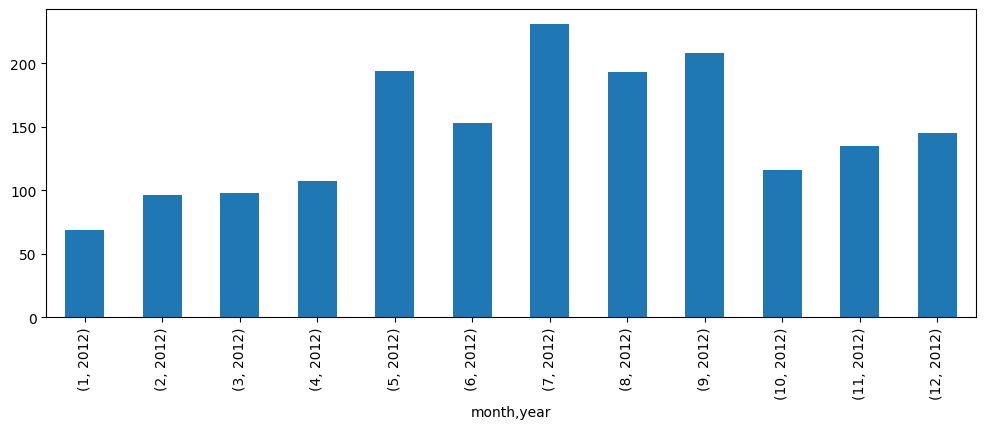

In [31]:
# Crear columna para guardar el mes
df_pulls["month"] = df_pulls.date.dt.month  # nuevas columnas se crean con los corchetes

# Crear columna para guardar el año
df_pulls["year"] = df_pulls.date.dt.year

# Obtener solo los pulls donde year == 2012, para mejor visualizacion
counts_in_year = df_pulls[df_pulls.year == 2012]

# Agrupar por mes y año; contar el numero de pull requests.
# counts = df_pulls.groupby(["month", "year"]).count()
counts = counts_in_year.groupby(["month", "year"]).count()

# Graficar resultados
# counts.date.plot.bar()  # necesita del paquete matplotlib, instalarlo
counts.date.plot(kind="bar", figsize=(12, 4))  # figsize es width x height en inches

# 5. ¿Hay compañerismo en el proyecto?
La estructura organizativa varía de un proyecto a otro y puede influir en su éxito como colaborador. Un proyecto que tiene una comunidad muy pequeña podría no ser el mejor para empezar a trabajar. La pequeña comunidad podría indicar una gran barrera de entrada. Esto puede deberse a varios factores, incluida una comunidad que se resiste a aceptar solicitudes de pull requests de "externos", que es difícil trabajar con la base de código, etc. Sin embargo, una comunidad grande puede servir como un indicador de que el proyecto acepta solicitudes de pull requests de nuevos colaboradores regularmente. Tal proyecto sería un buen lugar para comenzar.

Para evaluar la dinámica de la comunidad, trazaremos un histograma de la cantidad de pull requests enviadas por cada usuario. Una distribución que muestre que hay pocas personas que solo contribuyen con una pequeña cantidad de pull requests se puede utilizar como indicador de que el proyecto no está recibiendo nuevos contribuyentes.

<Axes: ylabel='Frequency'>

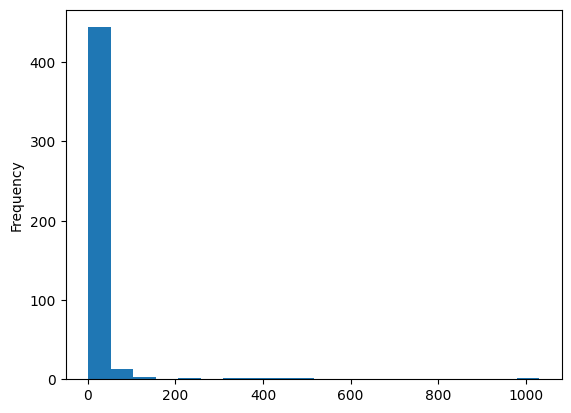

In [33]:
# Agrupar por usuario
counts_by_user = df_pulls.groupby(["user"]).count()
# Graficar histograma
counts_by_user.pid.plot.hist(bins=20)  # Cantidad de barras entre instancias de x (entre 0 - 200)

# 6. ¿Qué archivos se cambiaron en los últimos diez pull requests?
Elegir el lugar adecuado para hacer una contribución es tan importante como elegir el proyecto al que contribuir. Algunas partes del código pueden ser estables, otras pueden estar muertas. Contribuir allí podría no tener el mayor impacto. Por lo tanto, es importante comprender las partes del sistema que se han modificado recientemente. Esto nos permite identificar las áreas "calientes" del código donde ocurre la mayor parte de la actividad. Centrarse en esas partes podría no ser el uso más efectivo de nuestros tiempos.

In [42]:
# Identificar los ultimos 10 pull requests
df_last_pulls = df_pulls.sort_values(by="date", ascending=False).head(10)

# Unir con pull files
df_last_pulls = df_last_pulls.merge(df_pull_files, on="pid")

# Eliminar archivos repetidos
files = set(df_last_pulls.file)

# Imprimir resultados
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

# 7. ¿Quién realizó la mayor cantidad de pull requests a un archivo determinado?
Al contribuir a un proyecto, es posible que necesitemos alguna orientación. Es posible que necesitemos información sobre el código base. Es importante dirigir cualquier pregunta a la persona adecuada. Los colaboradores de proyectos de código abierto generalmente tienen otros trabajos diarios, por lo que su tiempo es limitado. Es importante dirigir nuestras preguntas a las personas adecuadas. Una forma de identificar el objetivo correcto para nuestras consultas es utilizando su historial de contribuciones.

Identificamos <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code> como modificado recientemente. Estamos interesados en los 3 principales desarrolladores que cambiaron ese archivo. Esos desarrolladores son los que probablemente tengan la mejor comprensión del código.

In [47]:
# Archivo en el que estamos interesados:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identificamos que commits modificaron el archivo
df_file = df_data[df_data.file == file]

# Contamos el numero de cambios por cada developer
developer_count = df_file.groupby("user").count()

# Imprimimos el top ten 3 developers
developer_count.sort_values(by="pid", ascending=False).head(3)

,pid,date,file,month,year
user,,,,,
xeno-by,11,11,11,11,11
retronym,5,5,5,5,5
soc,4,4,4,4,4


# 8. ¿Quién realizó las últimas diez solicitudes de incorporación de cambios en un archivo determinado?
Los proyectos de código abierto sufren de cambios en los integrantes. Esto hace que el problema de encontrar a la persona adecuada sea más desafiante: la persona debe estar bien informada y aun así estar involucrada en el proyecto. Es posible que una persona que contribuyó mucho en el pasado ya no esté disponible (o dispuesta) a ayudar. Para obtener una mejor comprensión, necesitamos investigar la historia más reciente de esa parte particular del sistema.

Al igual que en la tarea anterior, veremos el historial de <code>src/compiler/scala/reflect/reify/phases/Calculate.scala.</code>

In [7]:
# Archivo en el que estamos interesados:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Seleccionamos los pull request que cambiaron al archivo de interes

# Unimos los resultados obtenidos con el pulls DataFrame


# Buscamos los usuarios de las ultimas 10 pull requests

# Imprimimos resultados

# 9. Los pull requests de dos desarrolladores especiales
Ahora que hemos identificado dos contactos potenciales en los proyectos, necesitamos encontrar a la persona que estuvo más involucrada en el proyecto en los últimos tiempos. Es más probable que esa persona responda a nuestras preguntas. Estamos interesados en comprender la cantidad de pull requests que enviaron los autores. Esto nos dará una imagen de su tendencia de contribución al proyecto.

In [ ]:
# Los desarrolladores en los que estamos interesados:
authors = ['xeno-by', 'soc']

# Traer todos los pull requests de esos desarrolladores:

# Contar el número de pull requests de cada año

# Convertir tabla

# Graficar resultados

# 10. Visualizando las contribuciones de cada desarrollador
Como se mencionó anteriormente, es importante hacer una distinción entre la experiencia global y los niveles de contribución y los niveles de contribución a un nivel más granular (archivo, submódulo, etc.) En nuestro caso para cada año, queremos ver cuál de nuestros dos desarrolladores de interés tiene la mayor experiencia con el código en un archivo dado. Mediremos la experiencia por la cantidad de pull requests enviadas que afectan a ese archivo y qué tan recientemente se enviaron esas solicitudes.

In [ ]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Filtrar dataframe por autor

# Seleccionar pull requests de determinado archivo

# Agrupar y contar el número de pull requests echos por cada usuario en cada año

# Convertir tabla


# Graficar resultados
